In [141]:
import numpy as np

In [142]:
def train_lin(X_in, Y):

    """
    Input :

    Ouput :

    """
    
    n = X_in.shape[1]
    m = X_in.shape[0]
    one_cnt = np.sum(Y)
    
    np.set_printoptions(precision=3,suppress=True)
    
    X = np.ones((m,n))
    mean = np.zeros(m)
    std = np.zeros(m)
    for i in range(n):
        mean[i] = X_in[:,i].mean()
        std[i]  = np.std(X_in[:,i])
#         X[:,i] = X_in[:,i]
        X[:,i] = (X_in[:,i] - mean[i])/std[i]

    X_T = np.transpose(X)
    theta = np.zeros(n)
    
    m0 = np.zeros((1,n))
    m1 = np.zeros((1,n))
    
    Y_mat = np.zeros((100,1))
    Y_mat[:,0] = np.copy(Y)
    
    m0 = np.matmul((1-Y_mat).T, X) / (m - one_cnt)
    m1 = np.matmul(Y_mat.T, X) / one_cnt

    W = X - np.matmul((1-Y_mat), m0) - np.matmul(Y_mat, m1)
    
    sig = 1/m * np.matmul(W.T, W)
    sig_inv = np.linalg.inv(sig)
    print(sig)
    
    coeff = 2 * (m1-m0).dot(sig_inv)
    intercept = np.matmul(m1, np.matmul(sig_inv,m1.T)) - np.matmul(m0, np.matmul(sig_inv,m0.T))
    X1_boundary = (-(coeff[0][0] * (X_in[:,0])) + intercept[0][0]) / coeff[0][1]
    print(X_in[:,1])
    print(X1_boundary)
    import matplotlib.pyplot as plt
    plt.scatter(X_in[:,0],X_in[:,1],c=Y)
    plt.plot(X_in[:,0],X1_boundary,color='red')
    plt.show()

In [143]:
def train_qua(X_in, Y):

    """
    Input :

    Ouput :

    """
    
    n = X_in.shape[1]
    m = X_in.shape[0]
    one_cnt = np.sum(Y)
    
    np.set_printoptions(precision=3,suppress=True)
    
    X = np.ones((m,n))
    mean = np.zeros(m)
    std = np.zeros(m)
    for i in range(n):
        mean[i] = X_in[:,i].mean()
        std[i]  = np.std(X_in[:,i])
#         X[:,i] = X_in[:,i]
        X[:,i] = (X_in[:,i] - mean[i])/std[i]

    X_T = np.transpose(X)
    theta = np.zeros(n)
    
    m0 = np.zeros((1,n))
    m1 = np.zeros((1,n))
    Y_mat = np.zeros((100,1))
    Y_mat[:,0] = np.copy(Y)
    
    m0 = np.matmul((1-Y_mat).T, X) / (m - one_cnt)
    m1 = np.matmul(Y_mat.T, X) / one_cnt
    
    M0 = np.zeros(X.shape)
    M1 = np.zeros(X.shape)
    M0[:,] = m0
    M1[:,] = m1
    W = X - M0
    D = np.diag(1-Y)
    sigma_0 = (W.T @ D @ W) / (m-one_cnt)
    
    W = X - M1
    D = np.diag(Y)
    sigma_1 = (W.T @ D @ W) / one_cnt
    
    inv_sigma_0 = np.linalg.inv(sigma_0)
    inv_sigma_1 = np.linalg.inv(sigma_1)
    
    def fun(a,b):
        a = (a-mean[0]) / std[0]
        b = (b-mean[1]) / std[1]
        X = np.array([a,b])
        res = 0.
        for i in range(n):
            for j in range(n):
                res += (X[i]-m1[0][i]) * (X[j]-m1[0][j]) * inv_sigma_1[i][j]
                res -= (X[i]-m0[0][i]) * (X[j]-m0[0][j]) * inv_sigma_0[i][j]
        res += np.log(np.linalg.det(sigma_1)/np.linalg.det(sigma_0))
        return res;
    
    def draw_figure():
        import matplotlib.pyplot as plt

        x = np.linspace(-100, 400, 4000)
        y = np.linspace(-100, 1000, 4000)
        x, y = np.meshgrid(x, y)

        plt.contour(x,y,fun(x,y),[0])
        plt.scatter(X_in[:,0],X_in[:,1],c=Y)
        plt.show()
        
    draw_figure()
    
#     print(sigma_0, sigma_1, m0, m1)
    
#     sig = 1/m * np.matmul(W.T, W)
#     sig_inv = np.linalg.inv(sig)
    
#     coeff = 2 * (m1-m0).dot(sig_inv)
#     intercept = np.matmul(m1, np.matmul(sig_inv,m1.T)) - np.matmul(m0, np.matmul(sig_inv,m0.T))
#     intercept = intercept[0][0]
    
#     X1_boundary = (-(coeff[0][0] * (X_in[:,0])) + intercept) / coeff[0][1]
#     print(X_in[:,1])
#     print(X1_boundary)
#     import matplotlib.pyplot as plt
#     plt.scatter(X_in[:,0],X_in[:,1],c=Y)
#     plt.plot(X_in[:,0],X1_boundary,color='red')
#     plt.show()

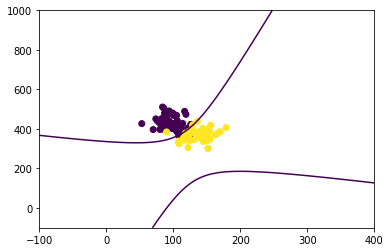

In [144]:
x_in = np.genfromtxt('../ass1_data/q4x.dat')
y_in_label = np.genfromtxt('../ass1_data/q4y.dat',delimiter=",",dtype=str)

y_in = np.zeros(y_in_label.shape[0])
for i in range(y_in_label.shape[0]):
    y_in[i] = 0 if y_in_label[i] == "Alaska" else 1

# train_lin(x_in, y_in)
train_qua(x_in, y_in)
    
# print(x_in.shape, y_in.shape)
# print(x_in,y_in,y_in_label)
# train(x_in, y_in)
# y_pred = train(x_in, y_in)